In [383]:
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import Week

In [384]:
data_dir = os.path.join('..', 'DATA')
file_name = 'Dishpatch Subscriptions_Clean_FINAL.xlsx'

file_path = os.path.abspath(os.path.join(data_dir, file_name))
if not os.path.exists(file_path):
    raise FileNotFoundError(f"Le fichier {file_path} est introuvable")

In [385]:
df = pd.read_excel(file_path)

df.info()

df['Cancellation Reason'].value_counts()
df['Amount'].value_counts()
df['Status'].value_counts()
df['Trial Start (UTC)'].value_counts()
df['Status'].value_counts()
df['Quantity'].value_counts()
df['kind (metadata)'].value_counts()
df['Canceled At (UTC)'].value_counts()
df['Amount'].value_counts()
df['kind (metadata)'].value_counts()
df['Product'].value_counts()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id                                  346 non-null    object        
 1   Customer ID                         346 non-null    object        
 2   Customer Description                0 non-null      float64       
 3   Customer ID.1                       346 non-null    object        
 4   Plan                                346 non-null    object        
 5   Product                             346 non-null    object        
 6   Product ID                          346 non-null    object        
 7   Quantity                            346 non-null    int64         
 8   Currency                            346 non-null    object        
 9   Cancellation Reason                 49 non-null     object        
 10  Interval                  

Index(['id', 'Customer ID', 'Customer Description', 'Customer ID.1', 'Plan',
       'Product', 'Product ID', 'Quantity', 'Currency', 'Cancellation Reason',
       'Interval', 'Amount', 'Status', 'Created (UTC)', 'Start (UTC)',
       'Start Date (UTC)', 'Current Period Start (UTC)',
       'Current Period End (UTC)', 'Trial Start (UTC)', 'Trial End (UTC)',
       'Application Fee Percent', 'Coupon', 'Tax Percent', 'Canceled At (UTC)',
       'Cancel At Period End', 'Ended At (UTC)', 'Exclusive Tax Rate',
       'Inclusive Tax Rate', 'Automatic Tax Enabled',
       'Tax Location Recognized', 'kind (metadata)',
       'senderShopifyCustomerId (metadata)', 'shopifyCustomerId (metadata)',
       'previousEndDate (metadata)'],
      dtype='object')

In [386]:
for col in df.select_dtypes(include='datetime64[ns]').columns:
    df[col + '_Year'] = df[col].dt.isocalendar().year
    df[col + '_Week'] = df[col].dt.isocalendar().week

df['Trial End (UTC) + 2 Weeks'] = df['Trial End (UTC)'] + pd.Timedelta(weeks=2)

df.head(1)
df.columns

Index(['id', 'Customer ID', 'Customer Description', 'Customer ID.1', 'Plan',
       'Product', 'Product ID', 'Quantity', 'Currency', 'Cancellation Reason',
       'Interval', 'Amount', 'Status', 'Created (UTC)', 'Start (UTC)',
       'Start Date (UTC)', 'Current Period Start (UTC)',
       'Current Period End (UTC)', 'Trial Start (UTC)', 'Trial End (UTC)',
       'Application Fee Percent', 'Coupon', 'Tax Percent', 'Canceled At (UTC)',
       'Cancel At Period End', 'Ended At (UTC)', 'Exclusive Tax Rate',
       'Inclusive Tax Rate', 'Automatic Tax Enabled',
       'Tax Location Recognized', 'kind (metadata)',
       'senderShopifyCustomerId (metadata)', 'shopifyCustomerId (metadata)',
       'previousEndDate (metadata)', 'Created (UTC)_Year',
       'Created (UTC)_Week', 'Start (UTC)_Year', 'Start (UTC)_Week',
       'Start Date (UTC)_Year', 'Start Date (UTC)_Week',
       'Current Period Start (UTC)_Year', 'Current Period Start (UTC)_Week',
       'Current Period End (UTC)_Year', 'Cur

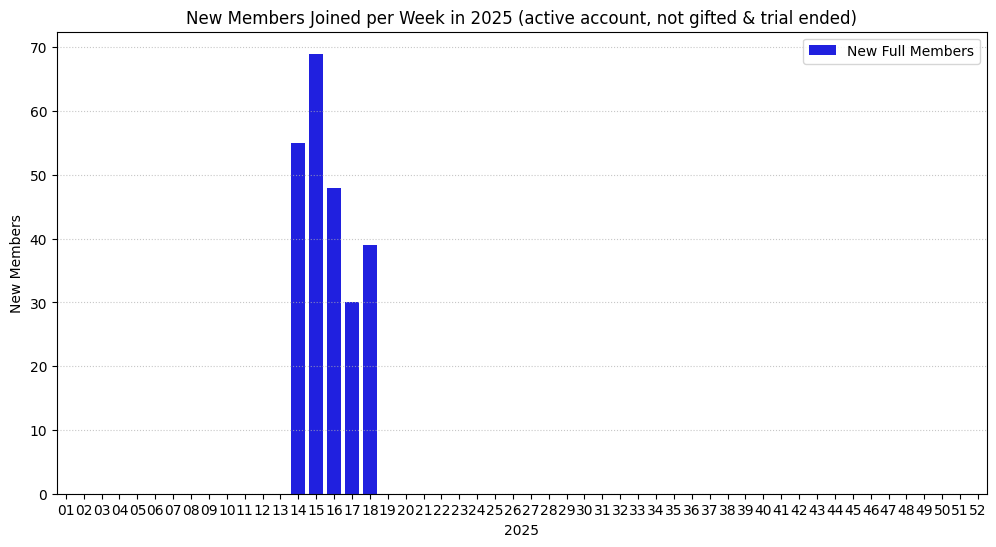

241 full new members with active account, not gifted & trial ended


In [387]:
# FULL MEMBER
# members who have completed their trial,
# have an active membership and are not gifted members
# did we have at the start of each week, since Sep 2023?

full_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) &
    (df['Trial End (UTC)'] < today) &
    (df['Status'] == 'active')
]


# Count new members per week for 2025 and reindex to include all weeks
week_labels = [f"{week:02d}" for week in range(1, 53)]
new_full_members = full_members['Start (UTC)_Week'].value_counts().reindex(range(1, 53), fill_value=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=week_labels, y=new_full_members.values, color='blue', label='New Full Members')
plt.xlabel('2025')
plt.ylabel('New Members')
plt.title('New Members Joined per Week in 2025 (active account, not gifted & trial ended)')
plt.xticks(rotation=0)
plt.grid(axis='y', visible=True, linestyle='dotted', alpha=0.7)

plt.show()
print(f"{len(full_members)} full new members with active account, not gifted & trial ended")

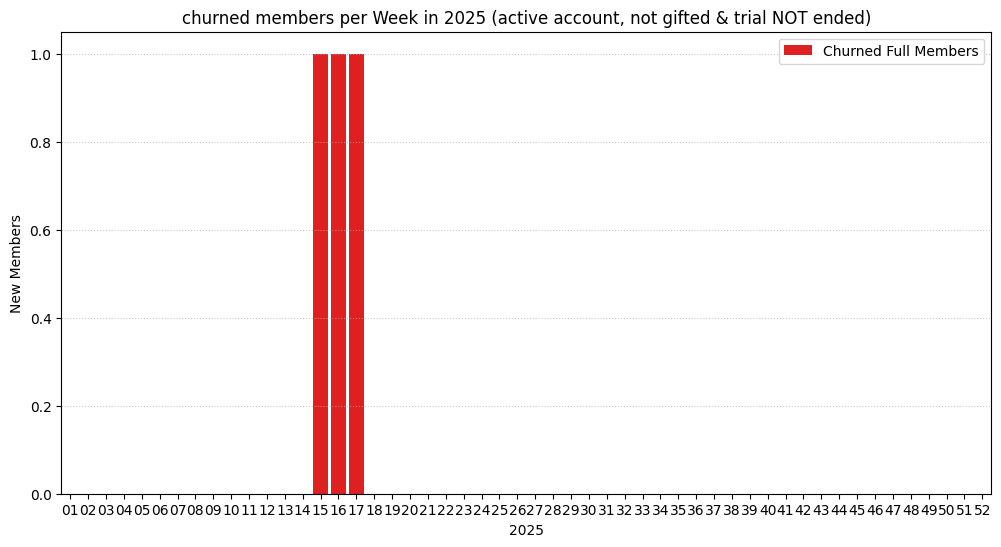

3 churned members with active account, not gifted & trial NOT ended


In [388]:
churned_members = df[
    (df['Canceled At (UTC)_Week'].notna()) &
    (df['senderShopifyCustomerId (metadata)'].isna()) &
    #(df['Trial End (UTC)'] < today) #&
    (df['Status'] == 'active')
]


churned_members

# Count Churned members per week for 2025 and reindex to include all weeks
new_churned_members = churned_members['Canceled At (UTC)_Week'].value_counts().reindex(range(1, 53), fill_value=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=week_labels, y=new_churned_members.values, color='red', label='Churned Full Members')
plt.xlabel('2025')
plt.ylabel('New Members')
plt.title('churned members per Week in 2025 (active account, not gifted & trial NOT ended)')
plt.xticks(rotation=0)
plt.grid(axis='y', visible=True, linestyle='dotted', alpha=0.7)

plt.show()
print(f"{len(churned_members)} churned members with active account, not gifted & trial NOT ended")

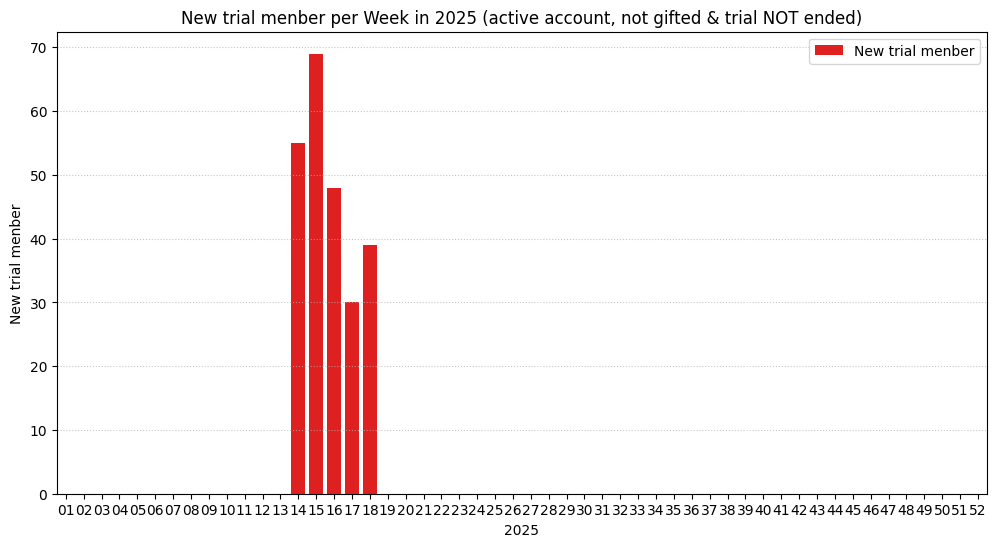

241 New trial menber with active account, not gifted & trial NOT ended


In [389]:
trial_members = df[
    (df['Trial Start (UTC)'].notna()) &
    (df['senderShopifyCustomerId (metadata)'].isna()) &
    (df['Trial Start (UTC)'] < today) &
    (df['Trial End (UTC)'] < today)
]



# Count Churned members per week for 2025 and reindex to include all weeks
new_trial_menber = trial_members['Trial Start (UTC)_Week'].value_counts().reindex(range(1, 53), fill_value=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=week_labels, y=new_trial_menber.values, color='red', label='New trial menber')
plt.xlabel('2025')
plt.ylabel('New trial menber')
plt.title('New trial menber per Week in 2025 (active account, not gifted & trial NOT ended)')
plt.xticks(rotation=0)
plt.grid(axis='y', visible=True, linestyle='dotted', alpha=0.7)

plt.show()
print(f"{len(trial_members)} New trial menber with active account, not gifted & trial NOT ended")

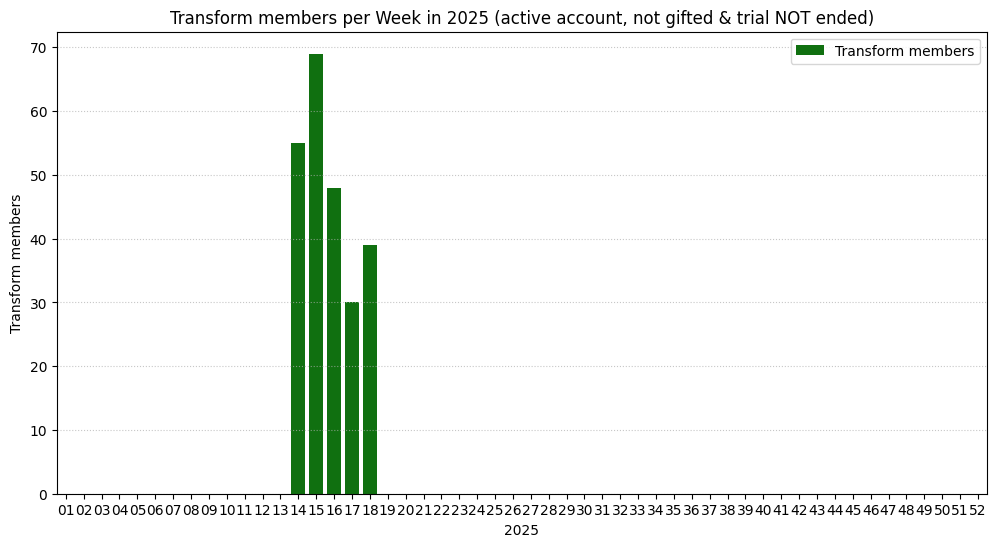

241 Transform members with active account, not gifted & trial NOT ended


In [390]:
transform_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) &
    (df['Status'] == 'active') &
    (df['Trial End (UTC)'] < today) &
    (
        df['Canceled At (UTC)'].isna() |  # n'a jamais annulé
        (df['Canceled At (UTC)'] > df['Trial End (UTC) + 2 Weeks'])
    )
]




# Transform members per week for 2025 and reindex to include all weeks
new_transform_members = transform_members['Trial End (UTC)_Week'].value_counts().reindex(range(1, 53), fill_value=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=week_labels, y=new_trial_menber.values, color='green', label='Transform members')
plt.xlabel('2025')
plt.ylabel('Transform members')
plt.title('Transform members per Week in 2025 (active account, not gifted & trial NOT ended)')
plt.xticks(rotation=0)
plt.grid(axis='y', visible=True, linestyle='dotted', alpha=0.7)

plt.show()
print(f"{len(transform_members)} Transform members with active account, not gifted & trial NOT ended")

In [ ]:
# How many full members (e.g. members who have completed their trial,
# have an active membership and are not gifted members)
# did we have at the start of each week, since Sep 2023?
full_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) &  # not gifted
    (df['Trial End (UTC)'] < today) &                    # Trial Over
    (df['Status'] == 'active')                           # is active
]

# How many new, full members joined during each week
new_full_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) & # not gifted
    (df['Trial End (UTC)'] < today) & # Trial Over
    (df['Status'] == 'active') # is active
]

# How many new members signed up to trial each week since 2023?
new_trial_members = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) & # not gifted
    (df['Trial Start (UTC)'] < today) &                  # Trial Over
    (df['Status'] == 'active')                           # is active
]

# How many of each weekly cohort converted trial -> full membership


# How many cancelled before the end of their trial date
members_cancel_during_trial = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) &  # not gifted
    (df['Trial End (UTC)'] < today) &                    # Trial Over
    (df['Canceled At (UTC)'] < df['Trial End (UTC)'])    # Cancel during trial
]

# How many requested a refund within 2 weeks of their full membership starting
members_cancel_2_weeks_after_trial_end = df[
    (df['senderShopifyCustomerId (metadata)'].isna()) & # not gifted
    (df['Canceled At (UTC)'] < df['Trial End (UTC) + 2 Weeks']
]

# How many of each weekly cohort renewed from Year 1 -> Year 2

# How many cancelled before the end of Year 1 membership

# How many requested a refund within 2 weeks of their Year 2 membership starting


,id,Customer ID,Customer Description,Customer ID.1,Plan,Product,Product ID,Quantity,Currency,Cancellation Reason,...,Current Period Start (UTC)_Week,Current Period End (UTC)_Year,Current Period End (UTC)_Week,Trial Start (UTC)_Year,Trial Start (UTC)_Week,Trial End (UTC)_Year,Trial End (UTC)_Week,Canceled At (UTC)_Year,Canceled At (UTC)_Week,Trial End (UTC) + 2 Weeks


In [403]:
not_transform_members
#transform_members

,id,Customer ID,Customer Description,Customer ID.1,Plan,Product,Product ID,Quantity,Currency,Cancellation Reason,...,Current Period Start (UTC)_Week,Current Period End (UTC)_Year,Current Period End (UTC)_Week,Trial Start (UTC)_Year,Trial Start (UTC)_Week,Trial End (UTC)_Year,Trial End (UTC)_Week,Canceled At (UTC)_Year,Canceled At (UTC)_Week,Trial End (UTC) + 2 Weeks
